# How to select a mesh substructure?

This notebook shows how to select a subset of a mesh that is encoded by a color.

In [1]:
import pyvista as pv

from polpo.preprocessing.load import FigsharePregnancyDataLoader
from polpo.preprocessing.mesh.conversion import PvFromData
from polpo.preprocessing.mesh.filter import PvSelectColor
from polpo.preprocessing.mri import (
    MeshExtractorFromSegmentedImage,
    MriImageLoader,
)
from polpo.preprocessing.path import FileFinder, FileRule

[KeOps] Warning : cuda was detected, but driver API could not be initialized. Switching to cpu only.


In [2]:
STATIC_VIZ = True

if STATIC_VIZ:
    pv.set_jupyter_backend("static")

## Mesh from MRI

Following [How to get a mesh from an MRI image?](mri2mesh.ipynb), we get a `pv.PolyData` object representing the hippocampus.

In [3]:
SESSION_ID = 1

In [4]:
folder_name = f"BB{str(SESSION_ID).zfill(2)}"


loader = FigsharePregnancyDataLoader(
    data_dir="~/.herbrain/data/pregnancy/Segmentations",
    remote_path=f"Segmentations/{folder_name}",
)

finder = FileFinder(
    rules=[
        FileRule(value="left", func="startswith"),
        FileRule(value=".nii.gz", func="endswith"),
    ]
)


pipe = (
    loader
    + finder
    + MriImageLoader()
    + MeshExtractorFromSegmentedImage()
    + PvFromData()
)

In [5]:
mesh = pipe()

INFO: Data has already been downloaded... using cached file ('/home/luisfpereira/.herbrain/data/pregnancy/Segmentations/BB01').


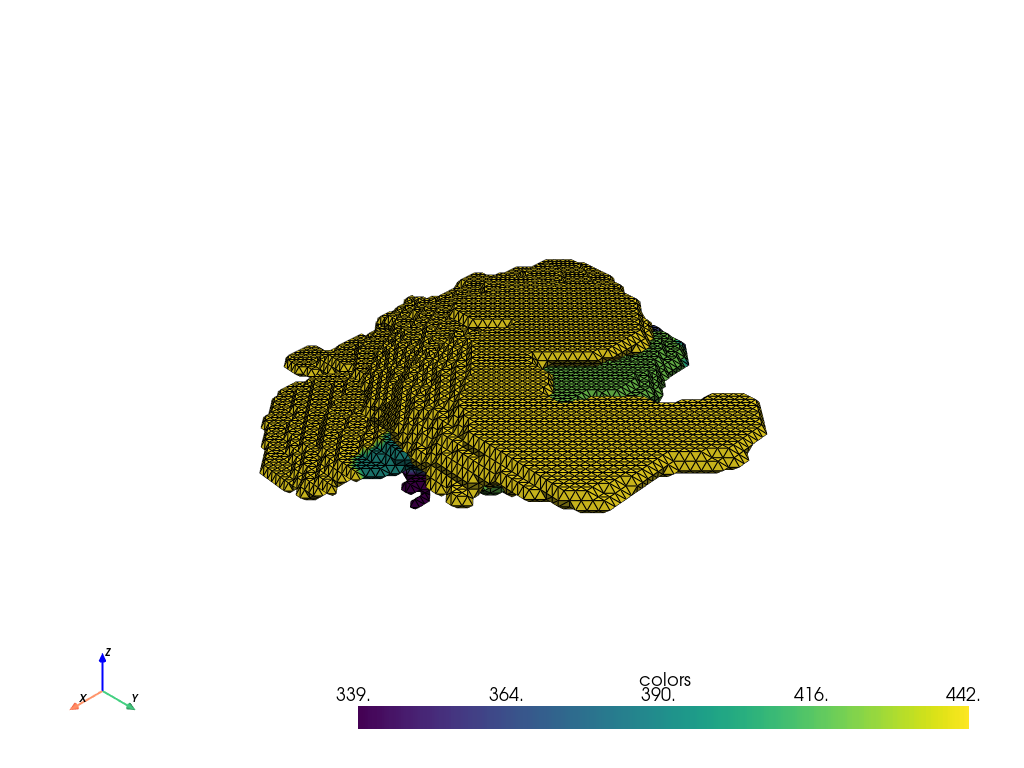

In [6]:
pl = pv.Plotter(border=False)

pl.show_axes()
pl.add_mesh(mesh, show_edges=True)
pl.show()

## Select a subtructure

Substructures are endoded by colors. We start by mapping their name to the corresponding color.

In [7]:
STRUCT2COLOR = {
    "PRC": (255, 0, 255, 255),
    "PHC": (0, 255, 255, 255),
    "AntHipp": (255, 215, 0, 255),
    "ERC": (255, 255, 0, 255),
    "SUB": (80, 179, 221, 255),
    "PostHipp": (184, 115, 51, 255),
    "CA1": (255, 0, 0, 255),
    "DG": (0, 0, 255, 255),
    "CA2+3": (0, 255, 0, 255),
}

We now create a preprocessing step that selects the cells of the mesh with the given color.

In [8]:
struct_selector = PvSelectColor(extract_surface=True)

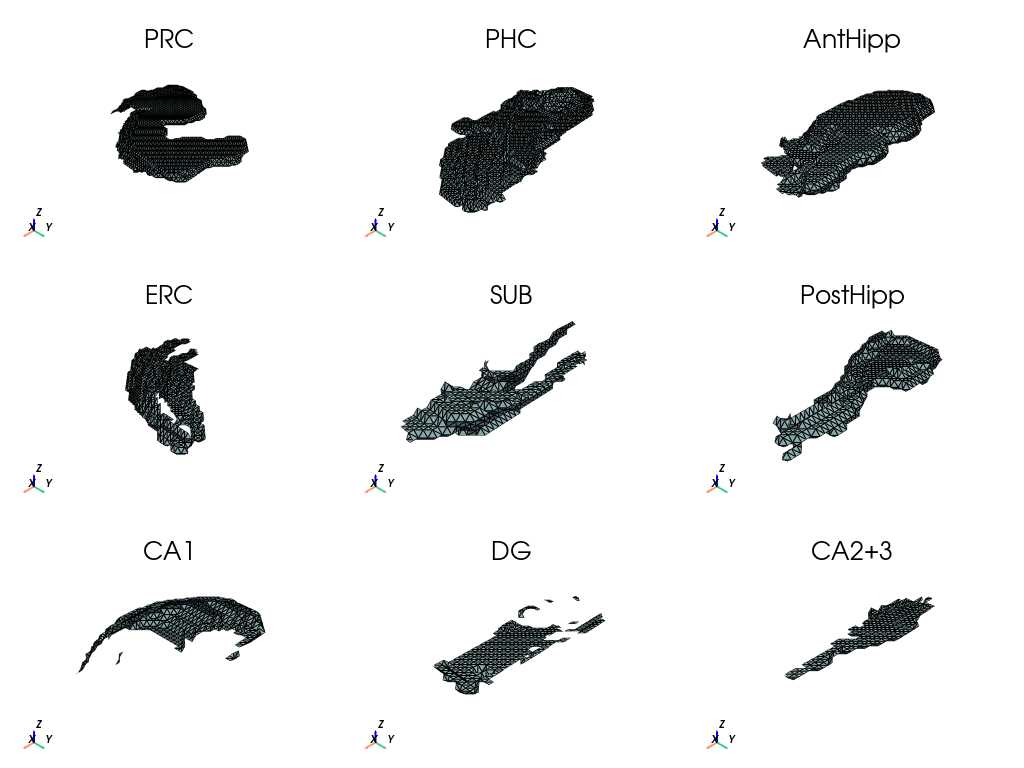

In [9]:
n_cols = 3
pl = pv.Plotter(shape=(3, n_cols), border=False)

for index, struct_name in enumerate(STRUCT2COLOR):
    row, col = index // n_cols, index % n_cols
    pl.subplot(row, col)

    color = STRUCT2COLOR[struct_name]

    substructure = struct_selector((mesh, color))

    pl.show_axes()
    substructure.clear_data()
    pl.add_mesh(substructure, show_edges=True)
    pl.add_title(struct_name, font_size=10)

pl.show()

Any mesh preprocessing step can now be applied to the substructure.